# Gray-Scott PDE equations
This notebook shows how to use the function in this git repository to numerically solve the PDE, generate data, run tests and perform inference. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('python_files/')
from Pde_solver import Solver
from Inference import Inference

## Solve PDE and generate data
The following lines call the `Solver` class to solve the Gray-Scott equations. 

#### Spatial grid:
The solver uses a square grid with `n_grid` x `n_grid` points, and periodic boundary conditions in both x and y directions. For generating data we recommend `n_grid = 256`, and for inference `n_grid=64`. 

#### Time points:
You can set the number of time points to use in `Solver`. Additionally, the `solve()` function can be called with `til_convergence=True` to abort solving once the stopping criterion has been reached (if the summed relative change < `rel_tol`).

In [5]:
## Initiate PDE solver class 
solv = Solver(n_save_frames=800, n_time_points=8000, model='gray-scott', n_grid=64)

In [6]:
## Set F & k parameters and solve
## spots: F=0.035, k=0.065
## maze-like: F=0.035, k=0.06
F = 0.035
k = 0.06

tmp = solv.solve(parameters=[F, k], verbose=True, til_convergence=True)  # parameters = [F, k]

  2%|▏         | 195/8000 [00:00<00:04, 1949.61it/s]

Solving gray-scott model in 8000 time steps.




 42%|████▏     | 3394/8000 [00:01<00:02, 2073.74it/s]

Convergence reached after 3461/8000 time points


### Plot results:
You can either plots results in custom format, by calling `Solver.u_mat` for the latest result or `Solver.save_u_mat[time_frame, :, :]` for intermediate results at `time_frame` (taken at regular intervals, as defined by `n_save_frames`). Similarly one can plot the `v` matrices. 
Alternatively, you can use the plotting functions of `Solver`: 
   - `Solver.plot2d()` to plot the the `u` and `v` matrices. 
   - `Solver.animation()` to create a gif animation of all saved intermediate results. This is saved to disk (in the current directory).

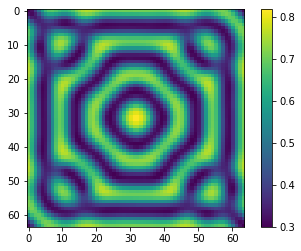

In [8]:
## Plot result
plt.imshow(solv.u_mat[:, :])
plt.colorbar()

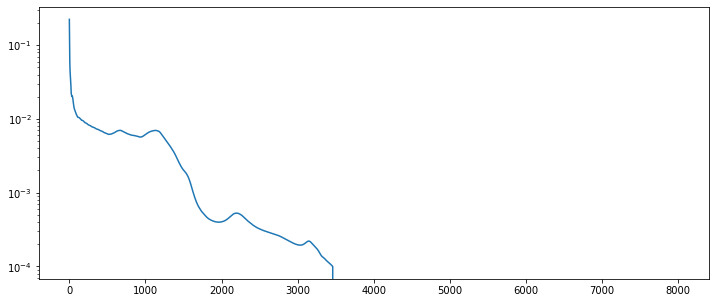

In [12]:
plt.plot(solv.convergence)
plt.yscale('log')

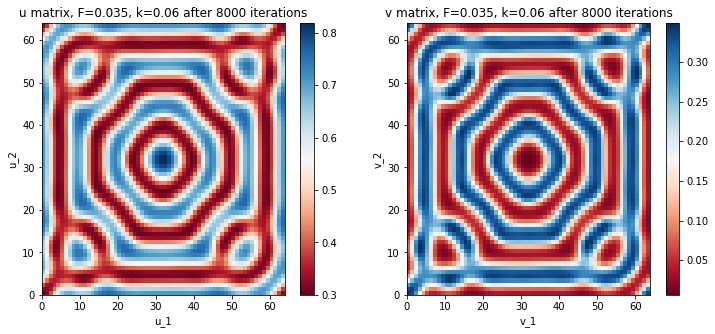

In [11]:
## Or use plotting function from class
solv.plot2d()

In [ ]:
## Save animation to disk
plt.rcParams['figure.figsize'] = (6, 6)
solv.animation()

In [29]:
len(solv.save_times)
solv.save_times
solv.save_u_mat.reshape(solv.n_save_frames, solv.n_x * solv.n_y).shape

(20, 65536)

## Inference
Perform inference using `pints`.


In [5]:
## Initiate inference class:
inference = Inference(solv, solv.save_times, solv.save_u_mat.reshape(solv.n_save_frames, solv.n_x * solv.n_y))
# problem = pints.MultiOutputProblem(solv, solv.save_times, solv.save_u_mat.reshape(solv.n_save_frames, solv.n_x * solv.n_y))

In [6]:
inference.optimise()

Minimising error measure
Using Seperable Natural Evolution Strategy (SNES)
Running in sequential mode.
Population size: 6
Iter. Eval. Best      Time m:s
0     6      12296.21   0:06.7
1     12     12296.21   0:12.4
2     18     12296.21   0:16.8
3     24     12296.21   0:21.5
20    126    12296.21   1:47.6
40    246    12296.21   3:18.7
60    366    12296.21   4:51.7
80    486    12296.21   6:21.8
100   606    12296.21   7:55.2
120   726    12296.21   9:26.7
140   846    12296.21  10:54.2
160   966    12296.21  12:23.1

----------------------------------------
Unexpected termination.
Current best score: 12296.210907572162
Current best position:
 2.38206826724623108e-02
 4.21184742298961912e-01
----------------------------------------


KeyboardInterrupt: 